## TASK 6

# Prediction using Decision Tree Algorithm
 
 Objective : Create the Decision Tree classifier and visualize it graphically.
             The purpose is if we feed any new data to this classifier, it would be able to
             predict the right class accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.drop('Id',axis=1,inplace=True)

In [6]:
data['Species'] = data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

In [12]:
from sklearn import tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtc = DecisionTreeClassifier()

In [15]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
y_predict = dtc.predict(x_test)

In [17]:
y_predict

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
confusion_matrix(y_test,y_predict)

array([[20,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 11]], dtype=int64)

In [20]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.86      0.92        14
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [21]:
accuracy_score(y_test,y_predict)

0.9555555555555556

## We Got 98 % Accuracy For This Model.
# Model Visualization.

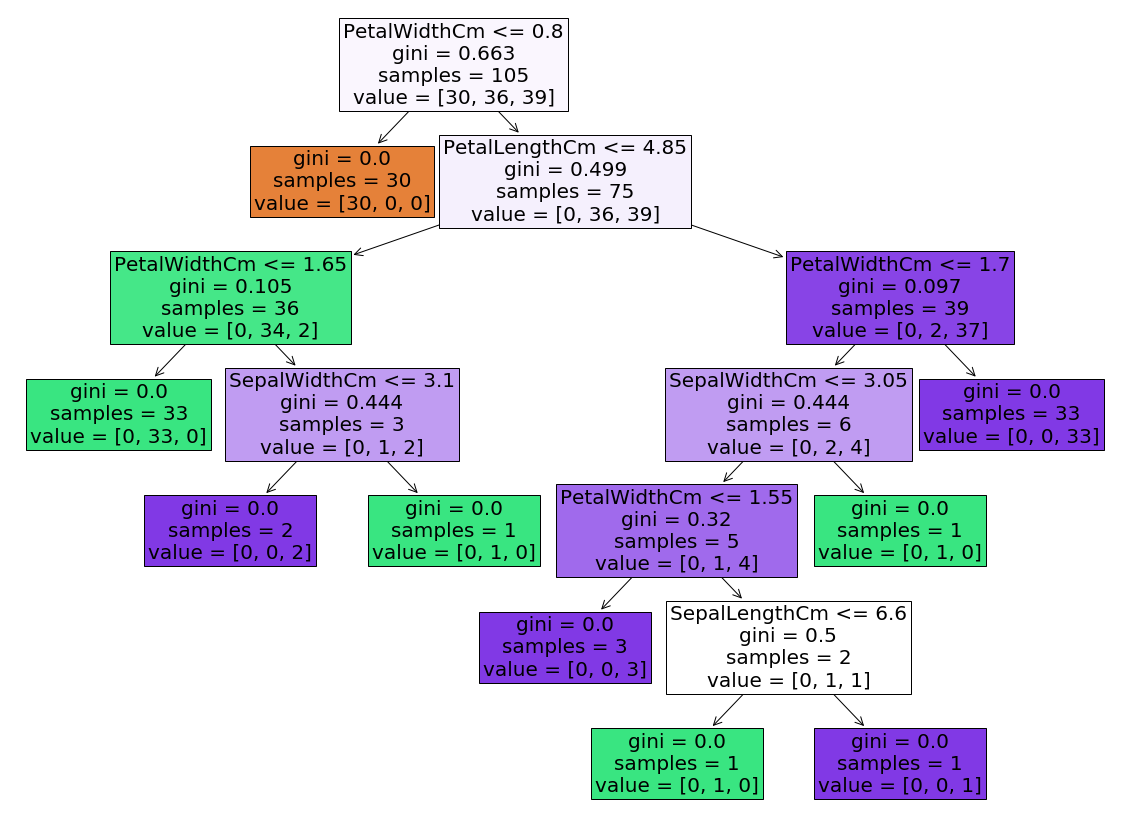

In [22]:
plt.figure(figsize=(20,15))
dtc_plot = tree.plot_tree(dtc,feature_names=x.columns,filled=True,fontsize=20)

# Prediction On Randomly Created Data.

In [23]:
new_data =  pd.DataFrame({'SepalLengthCm':[4.4,5.4,6.4,5.9,4.8],
                         'SepalWidthCm':[2.1,2.5,3.2,3.5,4.1],
                         'PetalLengthCm':[1.5,2.5,3.5,4.5,5.5],
                         'PetalWidthCm':[0.3,0.7,1.5,1.8,2.2]})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.4,2.1,1.5,0.3
1,5.4,2.5,2.5,0.7
2,6.4,3.2,3.5,1.5
3,5.9,3.5,4.5,1.8
4,4.8,4.1,5.5,2.2


In [24]:
new_predict = dtc.predict(new_data)

In [25]:
new_data['Predicted_Species'] = new_predict
new_data['Predicted_Species'] = new_data['Predicted_Species'].map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted_Species
0,4.4,2.1,1.5,0.3,Iris-setosa
1,5.4,2.5,2.5,0.7,Iris-setosa
2,6.4,3.2,3.5,1.5,Iris-versicolor
3,5.9,3.5,4.5,1.8,Iris-versicolor
4,4.8,4.1,5.5,2.2,Iris-virginica


# Thank You.